<a href="https://colab.research.google.com/github/Carissa30/Carissa30/blob/main/spamVisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
         Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4  


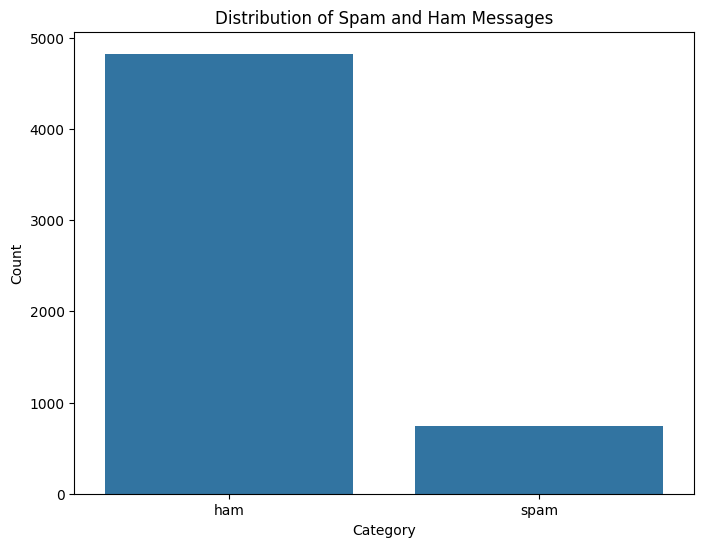

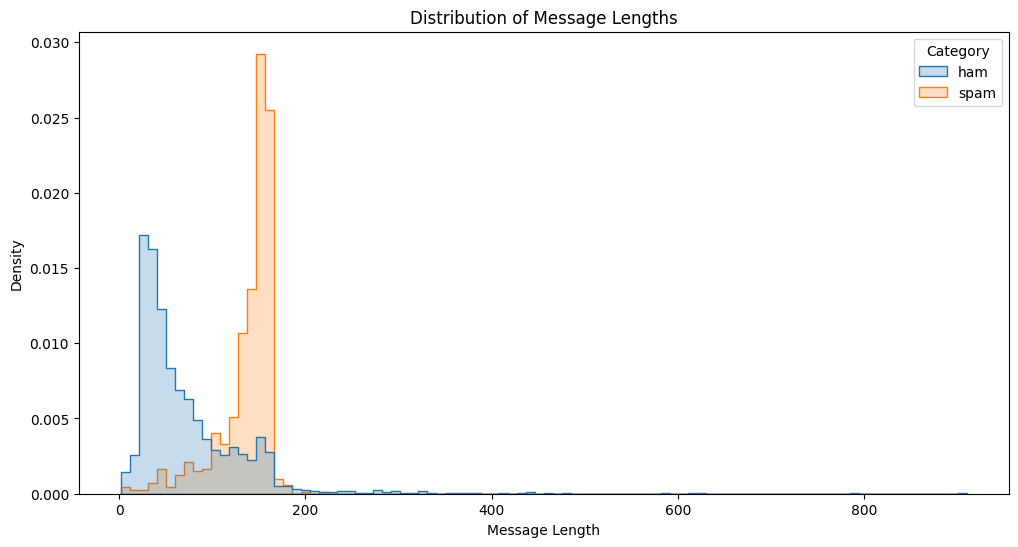

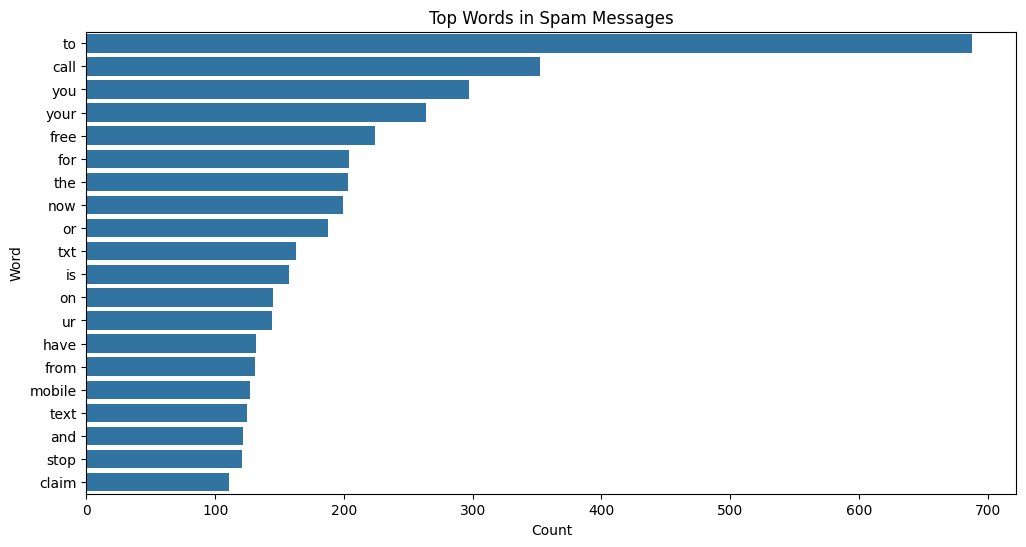

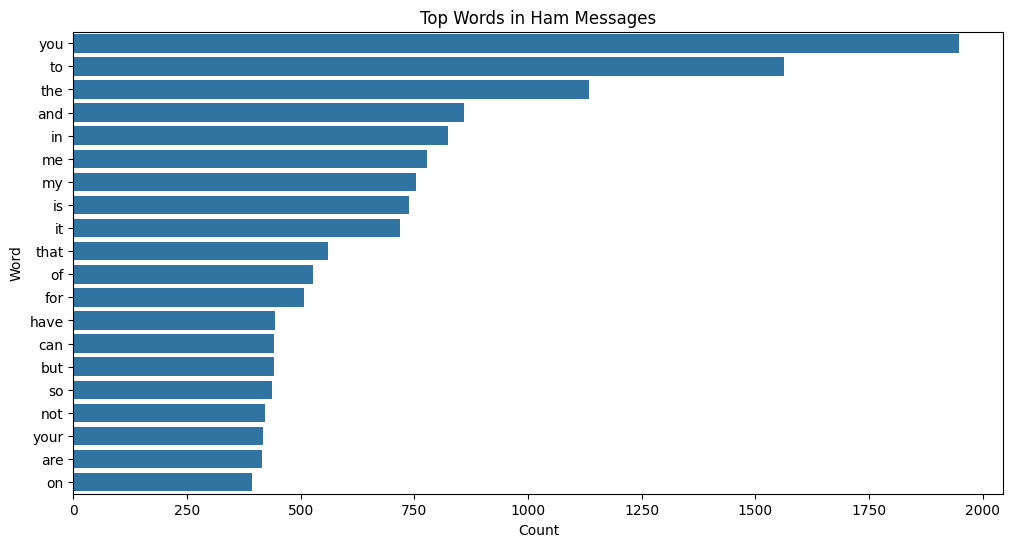

count                       4457
unique                      4166
top       Sorry, I'll call later
freq                          21
Name: Message, dtype: object
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Ham prediction: [0] (0 indicates ham)
Spam prediction: [1] (1 indicates spam)
Model accuracy: 99.19%


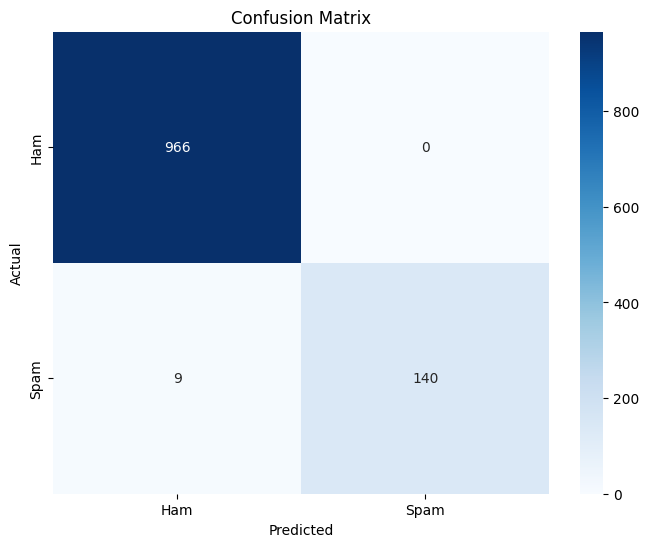

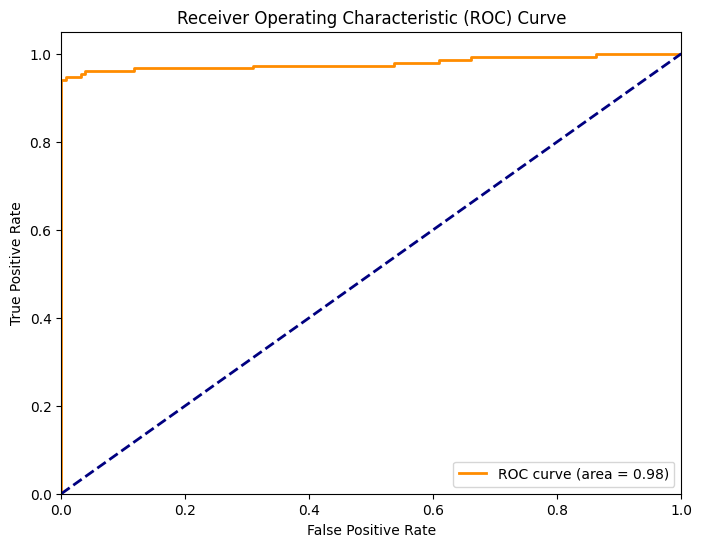

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from collections import Counter

# Load the dataset
spam_df = pd.read_csv("spam.csv")

# Display the first few rows of the dataset to ensure it has loaded correctly
print(spam_df.head())

# Group the dataset by 'Category' and describe to get a summary of the data
print(spam_df.groupby('Category').describe())

# Create a new column 'spam' with numerical values: 1 for spam and 0 for ham
spam_df['spam'] = spam_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Plot the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=spam_df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Visualize the length of messages for spam and ham
spam_df['message_length'] = spam_df['Message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=spam_df, x='message_length', hue='Category', element='step', stat='density', common_norm=False)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()

# Get top words in spam and ham messages
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Plot top words in spam messages
spam_words = get_top_n_words(spam_df[spam_df['Category'] == 'spam']['Message'], 20)
spam_df_top_words = pd.DataFrame(spam_words, columns = ['Word' , 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=spam_df_top_words)
plt.title('Top Words in Spam Messages')
plt.show()

# Plot top words in ham messages
ham_words = get_top_n_words(spam_df[spam_df['Category'] == 'ham']['Message'], 20)
ham_df_top_words = pd.DataFrame(ham_words, columns = ['Word' , 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=ham_df_top_words)
plt.title('Top Words in Ham Messages')
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam, test_size=0.2, random_state=42)

# Display a summary of the training set
print(x_train.describe())

# Initialize the CountVectorizer to convert text data to a matrix of token counts
cv = CountVectorizer()

# Fit and transform the training data to a count matrix
x_train_count = cv.fit_transform(x_train.values)

# Convert the count matrix to an array (optional, for inspection)
print(x_train_count.toarray())

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model with the training data
model.fit(x_train_count, y_train)

# Test the model with a ham email example
email_ham = ["Do we have college tomorrow?"]
email_ham_count = cv.transform(email_ham)
ham_prediction = model.predict(email_ham_count)
print(f"Ham prediction: {ham_prediction} (0 indicates ham)")

# Test the model with a spam email example
email_spam = ["prize money reward congratulations"]
email_spam_count = cv.transform(email_spam)
spam_prediction = model.predict(email_spam_count)
print(f"Spam prediction: {spam_prediction} (1 indicates spam)")

# Transform the test data to a count matrix
x_test_count = cv.transform(x_test)

# Evaluate the model accuracy on the test data
accuracy = model.score(x_test_count, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Generate predictions on the test set
y_pred = model.predict(x_test_count)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test_count)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
